# **КРИТЕРІЙ ПІРСОНА ДЛЯ ПОРІВНЯННЯ ДЕКІЛЬКОЇ ГРУП ЗА РОЗПОДІЛЕННЯМ ОЗНАКИ**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
data = pd.read_csv("data.csv", encoding="utf-8")
table_crit = pd.read_excel("Critical Values of the Pearson test.xlsx")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
group_1 = data.loc[data.diagnosis == "M"]
group_2 = data.loc[data.diagnosis == "B"]

In [4]:
group_1 = group_1.sort_values(by="area_mean")
feature_1 = group_1.area_mean
group_2 = group_2.sort_values(by="area_mean")
feature_2 = group_2.area_mean

In [5]:
def split_feature(feature):    
    n3 = len(feature)
    n1 = n3 // 3
    n2 = n1 * 2
    low = feature.iloc[:n1]
    mid = feature.iloc[n1:n2]
    high = feature.iloc[n2:n3]
    return np.asarray([low, mid, high], dtype=object)

In [6]:
freq_1 = split_feature(feature_1)
freq_1 = np.asarray([len(freq_1[0]), len(freq_1[1]), len(freq_1[2])])
freq_2 = split_feature(feature_2)
freq_2 = np.asarray([len(freq_2[0]), len(freq_2[1]), len(freq_2[2])])

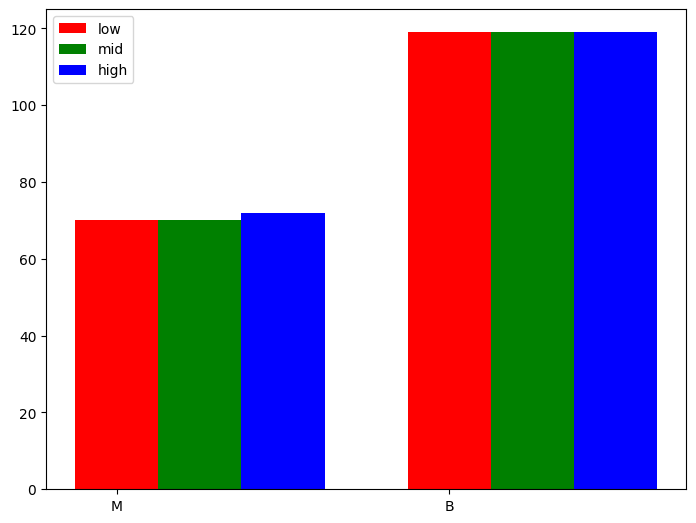

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ind = np.asarray([0, 1])
low = np.asarray([freq_1[0], freq_2[0]])
mid = np.asarray([freq_1[1], freq_2[1]])
high = np.asarray([freq_1[2], freq_2[2]])
x_legend = np.asarray(["low", "mid", "high"])
x_labels = np.asarray(["M", "B"])

ax.bar(ind + 0.00, low, color = 'r', width = 0.25)
ax.bar(ind + 0.25, mid, color = 'g', width = 0.25)
ax.bar(ind + 0.50, high, color = 'b', width = 0.25)

ax.legend(x_legend)
ax.set_xticks(ind, x_labels)

In [8]:
def criteria_Pearson(freq_1, freq_2, table_crit, significant_level):
    m = len(freq_1)
    rel_freq = np.zeros(m)
    n1 = np.sum(freq_1)
    n2 = np.sum(freq_2)
    if n1!=n2:
        for i in range(m):
            n = freq_1[i] - freq_2[i]
            if n>0:
                rel_freq[i] = freq_2[i] / n2
                freq_2[i] = rel_freq[i] * np.sum(freq_1)
            elif n<0:
                rel_freq[i] = freq_1[i] / n1
                freq_1[i] = rel_freq[i] * np.sum(freq_2)
    
    diff = np.zeros(m)
    for i in range(3):
        diff[i]= np.power(freq_1[i] - freq_2[i], 2)
    
    control_group = np.zeros(m)
    for i in range(3):
        control_group[i] = diff[i] / freq_2[i]
    
    empirical = np.sum(control_group)
    r = m - 1
    if significant_level==0.01:
        critical = table_crit.iloc[r, 1]
    elif significant_level==0.05:
        critical = table_crit.iloc[r, 2]
    
    if empirical>critical:
        print("There is a statistical divergence between two groups.\nThe features are not related.")
    elif empirical<critical:
        print("There is no statistical divergence between two groups.\nThe features are related.")
    
    df = pd.DataFrame({"area_mean": ["low", "mid", "high"],
                       "B": freq_1,
                       "M": freq_2})
    
    return df

In [9]:
significant_level = 0.05
final_df = criteria_Pearson(freq_1, freq_2, table_crit, significant_level)
final_df

There is no statistical divergence between two groups.
The features are related.


,area_mean,B,M
0,low,117,119
1,mid,117,119
2,high,121,119
